<a href="https://colab.research.google.com/github/Aiden619/Collab-Data-Mining/blob/main/Linear_and_Multiple_Linear_Regression_DM_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

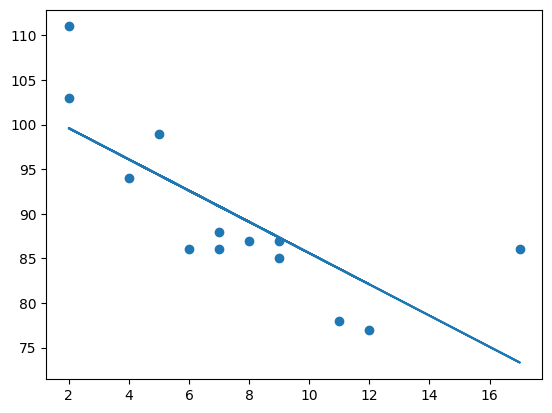

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
slope,intercept,r,p,std_err = stats.linregress(x,y)
def myfunc(x):
  return slope*x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/train.csv - train.csv.csv')
df

,sl,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.44178,0.0,6.20,0,0.504,6.552,21.4,3.3751,8,307,17.4,380.34,3.76,31.5
1,1,0.05372,0.0,13.92,0,0.437,6.549,51.0,5.9604,4,289,16.0,392.85,7.39,27.1
2,2,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666,20.2,7.68,24.39,8.3
3,3,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
4,4,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,399,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6
400,400,0.04379,80.0,3.37,0,0.398,5.787,31.1,6.6115,4,337,16.1,396.90,10.24,19.4
401,401,0.04560,0.0,13.89,1,0.550,5.888,56.0,3.1121,5,276,16.4,392.80,13.51,23.3
402,402,5.29305,0.0,18.10,0,0.700,6.051,82.5,2.1678,24,666,20.2,378.38,18.76,23.2


In [ ]:
df.describe()

,sl,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,201.500000,3.397354,11.456683,10.907426,0.074257,0.549308,6.296839,68.079703,3.808298,9.076733,398.717822,18.431683,361.763762,12.391584,22.836386
std,116.769003,8.947346,23.307205,6.788322,0.262514,0.112797,0.697770,28.427991,2.048038,8.350959,163.531315,2.166743,84.762901,6.952437,9.349152
min,0.000000,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,100.750000,0.082382,0.000000,5.175000,0.000000,0.449000,5.878750,44.225000,2.121275,4.000000,279.000000,17.400000,376.745000,6.987500,17.375000
50%,201.500000,0.247510,0.000000,8.560000,0.000000,0.532000,6.211500,76.600000,3.298600,5.000000,322.000000,18.900000,391.770000,10.875000,21.450000
75%,302.250000,2.340397,14.375000,18.100000,0.000000,0.624000,6.626250,93.925000,5.214600,8.000000,437.000000,20.200000,396.250000,16.330000,25.000000
max,403.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [ ]:
df.columns

Index(['sl', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
df.isnull().sum()

sl         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
X = df.iloc[:,1:14]
y = df['MEDV']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)

In [ ]:
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train,y_train)

In [ ]:
predictions = lin_model.predict(X_test)
predictions

array([27.400921  , 17.14917839, 17.42747723,  6.04682794, 15.02826332,
       33.33940922,  8.6343045 , 28.80404845,  8.73704078, 16.93720939,
       34.72307963, 25.98811501, 20.45958146, 24.26635489, 13.03162643,
       13.40594005, 16.65966382, 27.62609485, 19.28087951, 42.34101297,
       16.35729495, 18.04963595, 25.24630251, 23.61042956, 25.47732313,
       35.55038328, 23.17233138, 24.71532185, 20.88548344, 15.50571184,
       17.32661801, 39.9996365 , 29.89695978, 22.10541056, 18.57579846,
       39.32061938, 32.54836064, 26.83527031, 33.25436618, 20.16935292,
       31.50661447,  7.80449137, 29.54684469, 28.57009874, 21.30895489,
       30.70115923, 30.35871884, 25.42075248, 13.85811449,  8.56678655,
       30.13760524, 28.53185926, 18.19718809, 13.33515837,  7.0186088 ,
       22.38648278, 25.25205194, 30.02144275,  6.18996576, 40.07720531,
       16.59783577, 22.49945428, 21.06963198, 24.2839469 , 27.62827038,
       23.2354217 , 31.36511278, 22.35546959, 33.09463113, 33.02

In [ ]:
r2 = r2_score(y_test,predictions)
r2

0.7440655689785558

<Axes: xlabel='MEDV'>

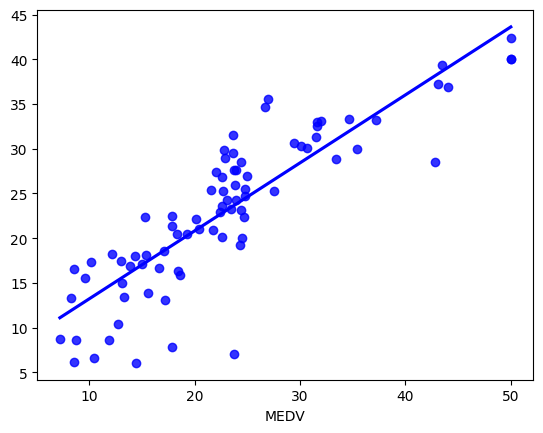

In [ ]:
sns.regplot(x=y_test,y=predictions,ci = None,color = 'blue')